In [1]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=0b2a40b81068c9b77f5c297dc55d87d64acf52b3efc932fc93051209bdf04ccf
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np 
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [4]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#Configuração dos parâmetros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas
# 3, 12, 20 são indices aleatórios de registros de bases de dados(inicialização)
cluster = kmedoids(iris.data[:, 0:2], [3,12,20])
#Visualização dos pontos escolihos (3,12,20)
cluster.get_medoids()

[3, 12, 20]

In [7]:
#Aplicação do algoritmo para o agrupamento, obtenção da previsões (grupo de cada registro) e visualização de medoides
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
#lista de 3 elementos, com indicesdos registros do cluster
previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

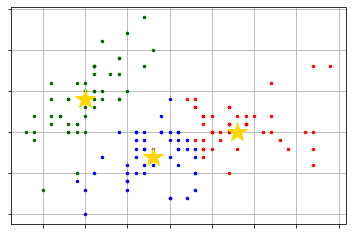

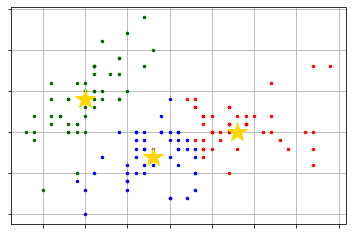

In [8]:
#Visualização do agrupamento
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = '*', markersize = 20)
v.show()

In [ ]:
#Código para criar duas listas, uma com os grupo reais da base de dados e outra com os valores dos grupos
#Utilizado posteriormente para visualização da matriz de contingência
lista_prev = []
lista_real = []
for i in range(len(previsoes)):
  for j in range(len(previsoes[i])):
    lista_prev.append(i)
    lista_real.append(iris.target[previsoes[i][j]])

In [ ]:
#Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_prev = np.asarray(lista_prev)
lista_real = np.asarray(lista_real)
resultado = confusion_matrix(lista_real, lista_prev)
resultado

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])